In [1]:
import numpy as np
import scipy
import h5py
import matplotlib.pyplot as plt

from simulation_data import get
from simulation_data.galaxies import GalaxyPopulation
my_galaxy_population = GalaxyPopulation()
from simulation_data.galaxies.galaxy import age_profile, get_star_formation_history, get_galaxy_particle_data, get_stellar_assembly_data, metallicity_profile, metals_profile, avg_abundance, total_stellar_mass

redshift = 0

In [2]:
with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'r') as f:
    ids = f['ids'][:]
    median_age = f['median_age'][:]
    halfmass_radius = f['halfmass_radius'][:]
    total_mass = f['total_mass'][:]
    newbin_current_SFR = f['newbin_current_SFR'][:]
    FeH_Re = f['FeH_Re'][:]
    MgFe_Re = f['MgFe_Re'][:]
    MgH_Re = f['MgH_Re'][:]
    FeH_1kpc = f['FeH_1kpc'][:]
    MgFe_1kpc = f['MgFe_1kpc'][:]
    MgH_1kpc = f['MgH_1kpc'][:]

In [3]:
# axes limits
M_lim = [10.5, 12]
logRe_lim = [-0.52, 1.94]
MRe_lim = [9.36, 11.89]
FeHRe_lim = [-0.39, 0.53]
FeH1kpc_lim = [-0.23, 0.53]
MgFeRe_lim = [0.21, 0.53]
MgFe1kpc_lim = [0.16, 0.55]
MgHRe_lim = [-0.03, 0.77]
MgH1kpc_lim = [0.16, 0.54]
age_lim = [0, 2.5]
ageabundance_lim = [-1.8, 0.9]
bigage_lim = [0, 13]


In [4]:
import warnings
warnings.filterwarnings('ignore')

# z=0.7 parameters
# 2 -> 4 Gyr
# 4 -> 6 Gyr
# -11 -> -11.5
PSB_selection = (median_age<=4)&(np.log10(newbin_current_SFR/10**(total_mass))<=-11.5)
intermediate_quiescent_selection = (median_age>4)&(median_age<=6)&(np.log10(newbin_current_SFR/10**(total_mass))<=-11.5)
old_quiescent_selection = (median_age>6)&(np.log10(newbin_current_SFR/10**(total_mass))<=-11.5)
starforming_selection = (np.log10(newbin_current_SFR/10**(total_mass))>-11.5)

In [7]:
print(len(ids[starforming_selection]))
print(len(ids[PSB_selection]))
print(len(ids[intermediate_quiescent_selection]))
print(len(ids[old_quiescent_selection]))

548
3
115
1807


# download z=0 galaxies

In [2]:
redshift = 0
#this initializes the values in simulation_data.galaxies.galaxy_population
# id_dict = {}
# id_dict[0] = my_galaxy_population.select_galaxies(redshift=redshift, mass_min=10.5, mass_max=10.8)
# id_dict[1] = my_galaxy_population.select_galaxies(redshift=redshift, mass_min=10.8, mass_max=11.1)
# id_dict[2] = my_galaxy_population.select_galaxies(redshift=redshift, mass_min=11.1, mass_max=11.4)
# id_dict[3] = my_galaxy_population.select_galaxies(redshift=redshift, mass_min=11.4, mass_max=11.7)
# id_dict[4] = my_galaxy_population.select_galaxies(redshift=redshift, mass_min=11.7, mass_max=12.0)

id_range = my_galaxy_population.select_galaxies(redshift=redshift, mass_min=10.5, mass_max=12.0)
print(len(id_range))

for idx in id_range:
    get_galaxy_particle_data(id=idx, redshift=redshift, populate_dict=False)

#this gets and saves the particle data for each galaxy in our selection
# ids = []
# for b in id_dict:
#     np.random.seed(13)
#     for idx in np.random.choice(id_dict[b], 10, replace=False):
#         ids.append(idx)
#         #get_galaxy_particle_data(id=idx, redshift=redshift, populate_dict=False)

http://www.tng-project.org/api/TNG100-1/snapshots/z=0/subhalos/?mass_stars__gt=2.14212688699806&mass_stars__lt=67.74


KeyboardInterrupt: 

In [2]:
#this initializes the values in simulation_data.galaxies.galaxy_population
ids = my_galaxy_population.select_galaxies(redshift=redshift, mass_min=10.5, mass_max=12)
print(len(ids))

#calculate halo properties and store calculated data
my_galaxy_population.get_galaxy_population_data()

http://www.tng-project.org/api/TNG100-1/snapshots/z=0/subhalos/?mass_stars__gt=2.14212688699806&mass_stars__lt=67.74
2855
deleted
10/25
deleted
11/25
deleted
12/25
deleted
13/25
deleted
14/25
deleted
15/25


KeyboardInterrupt: 

## [Fe/H]

Text(0.5, 1.0, 'z=0 galaxies')

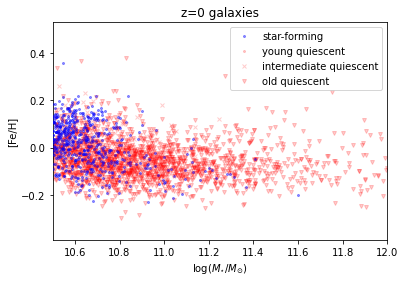

In [16]:
markersize=4

plt.figure()

yy = FeH_Re
xx = total_mass

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.2, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)

plt.xlim(M_lim[0], M_lim[1])
plt.ylim(FeHRe_lim[0], FeHRe_lim[1])
plt.xlabel('log($M_{\star}/M_{\odot}$)')
plt.ylabel('[Fe/H]')
plt.legend()
plt.title('z=' + str(redshift) + ' galaxies')

Text(0.5, 1.0, 'z=0 galaxies')

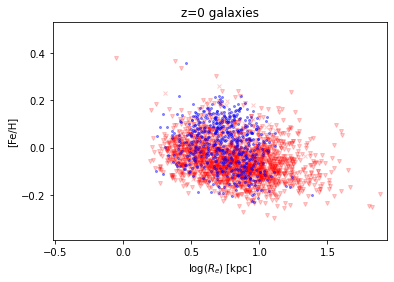

In [17]:
markersize=4

plt.figure()

yy = FeH_Re
xx = np.log10(halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.2, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)

plt.xlim(logRe_lim[0], logRe_lim[1])
plt.ylim(FeHRe_lim[0], FeHRe_lim[1])
plt.xlabel('log($R_e$) [kpc]')
plt.ylabel('[Fe/H]')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=0 galaxies')

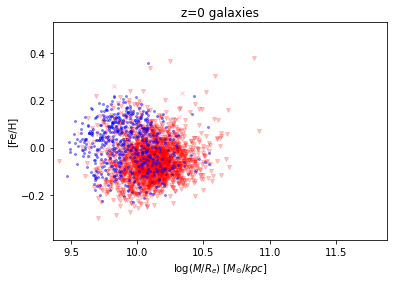

In [18]:
markersize=4

plt.figure()

yy = FeH_Re
xx = np.log10(10**total_mass / halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.2, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)

plt.xlim(MRe_lim[0], MRe_lim[1])
plt.ylim(FeHRe_lim[0], FeHRe_lim[1])
plt.xlabel('log($M/R_e)$ $[M_{\odot}/kpc]$')
plt.ylabel('[Fe/H]')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=0 galaxies')

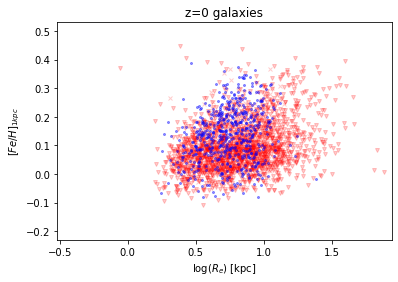

In [19]:
markersize=4

plt.figure()

yy = FeH_1kpc
xx = np.log10(halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.2, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)

plt.xlim(logRe_lim[0], logRe_lim[1])
plt.ylim(FeH1kpc_lim[0], FeH1kpc_lim[1])
plt.xlabel('log($R_e$) [kpc]')
plt.ylabel('$[Fe/H]_{1 kpc}$')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

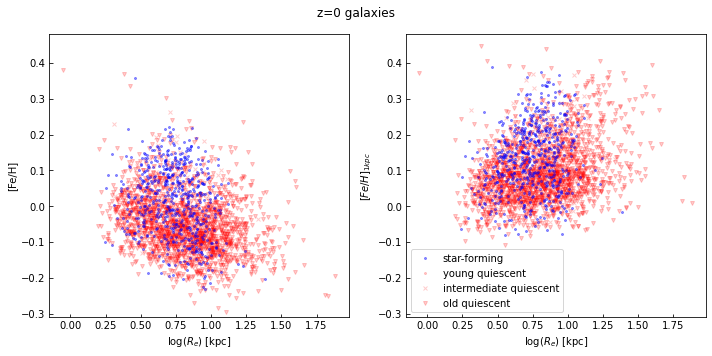

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
markersize = 4
ymin = -0.31
ymax = 0.48

yya = FeH_Re
yyb = FeH_1kpc
xx = np.log10(halfmass_radius)

yya1 = yya[starforming_selection]
yyb1 = yyb[starforming_selection]
xx1 = xx[starforming_selection]
ax1.plot(xx1, yya1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)
ax2.plot(xx1, yyb1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yya2 = yya[PSB_selection]
yyb2 = yyb[PSB_selection]
xx2 = xx[PSB_selection]
ax1.plot(xx2, yya2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)
ax2.plot(xx2, yyb2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)

yya3 = yya[intermediate_quiescent_selection]
yyb3 = yyb[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
ax1.plot(xx3, yya3, 'rx', alpha=0.2, label='intermediate quiescent', markersize=markersize)
ax2.plot(xx3, yyb3, 'rx', alpha=0.2, label='intermediate quiescent', markersize=markersize)

yya4 = yya[old_quiescent_selection]
yyb4 = yyb[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
ax1.plot(xx4, yya4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)
ax2.plot(xx4, yyb4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)

ax1.set_xlabel('log($R_e$) [kpc]')
ax1.set_ylabel('[Fe/H]')
ax1.set_ylim(ymin, ymax)
ax1.tick_params(axis='y', which='minor', left=True)
ax1.tick_params(axis='both', which='both', direction='in')

ax2.set_xlabel('log($R_e$) [kpc]')
ax2.set_ylabel('$[Fe/H]_{1 kpc}$')
ax2.set_ylim(ymin, ymax)
ax2.tick_params(axis='y', which='minor', left=True)
ax2.tick_params(axis='both', which='both', direction='in')
ax2.legend()

f.suptitle('z=' + str(redshift) +' galaxies')

f.tight_layout()

Text(0.5, 1.0, 'z=0 galaxies')

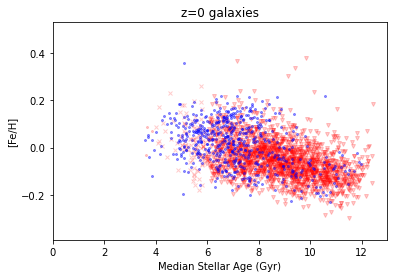

In [9]:
markersize=4

plt.figure()

yy = FeH_Re
xx = median_age

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.2, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)

plt.xlim(bigage_lim[0], bigage_lim[1])
plt.ylim(FeHRe_lim[0], FeHRe_lim[1])
plt.xlabel('Median Stellar Age (Gyr)')
plt.ylabel('[Fe/H]')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

## [Mg/Fe]

Text(0.5, 1.0, 'z=0 galaxies')

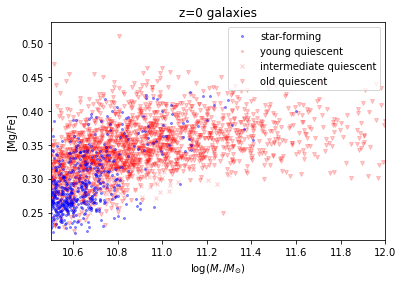

In [20]:
markersize=4

plt.figure()

yy = MgFe_Re
xx = total_mass

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.2, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)

plt.xlim(M_lim[0], M_lim[1])
plt.ylim(MgFeRe_lim[0], MgFeRe_lim[1])
plt.xlabel('log($M_{\star}/M_{\odot}$)')
plt.ylabel('[Mg/Fe]')
plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=0 galaxies')

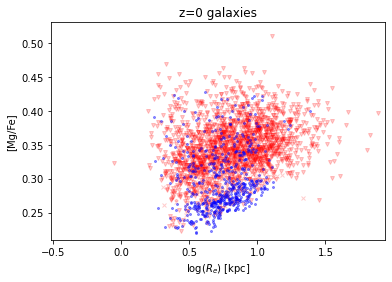

In [21]:
markersize=4

plt.figure()

yy = MgFe_Re
xx = np.log10(halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.2, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)

plt.xlim(logRe_lim[0], logRe_lim[1])
plt.ylim(MgFeRe_lim[0], MgFeRe_lim[1])
plt.xlabel('log($R_e$) [kpc]')
plt.ylabel('[Mg/Fe]')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=0 galaxies')

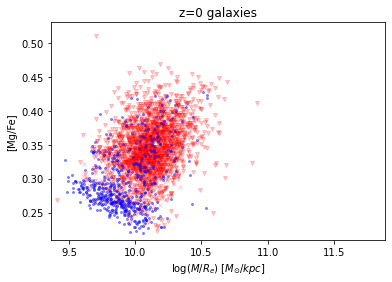

In [22]:
markersize=4

plt.figure()

yy = MgFe_Re
xx = np.log10(10**total_mass / halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.2, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)

plt.xlim(MRe_lim[0], MRe_lim[1])
plt.ylim(MgFeRe_lim[0], MgFeRe_lim[1])
plt.xlabel('log($M/R_e)$ $[M_{\odot}/kpc]$')
plt.ylabel('[Mg/Fe]')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=0 galaxies')

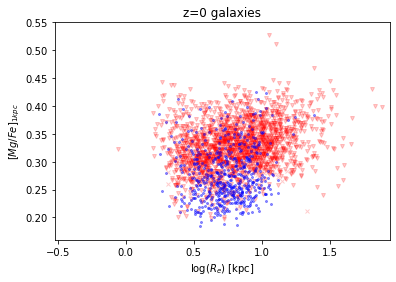

In [23]:
markersize=4

plt.figure()

yy = MgFe_1kpc
xx = np.log10(halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.2, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)

plt.xlim(logRe_lim[0], logRe_lim[1])
plt.ylim(MgFe1kpc_lim[0], MgFe1kpc_lim[1])
plt.xlabel('log($R_e$) [kpc]')
plt.ylabel('$[Mg/Fe]_{1 kpc}$')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=0 galaxies')

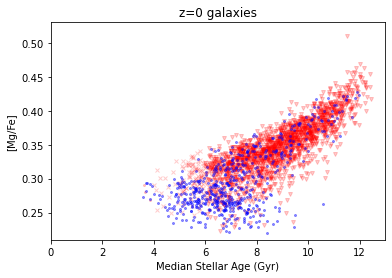

In [8]:
markersize=4

plt.figure()

yy = MgFe_Re
xx = median_age

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.2, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)

plt.xlim(bigage_lim[0], bigage_lim[1])
plt.ylim(MgFeRe_lim[0], MgFeRe_lim[1])
plt.xlabel('Median Stellar Age (Gyr)')
plt.ylabel('[Mg/Fe]')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

## [Mg/H]

Text(0.5, 1.0, 'z=0 galaxies')

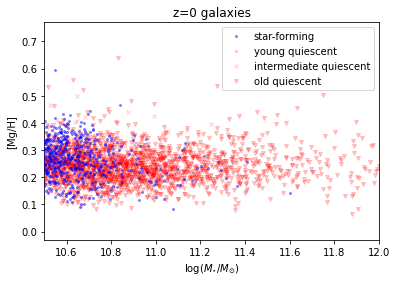

In [24]:
markersize=4

plt.figure()

yy = MgH_Re
xx = total_mass

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.2, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)

plt.xlim(M_lim[0], M_lim[1])
plt.ylim(MgHRe_lim[0], MgHRe_lim[1])
plt.xlabel('log($M_{\star}/M_{\odot}$)')
plt.ylabel('[Mg/H]')
plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=0 galaxies')

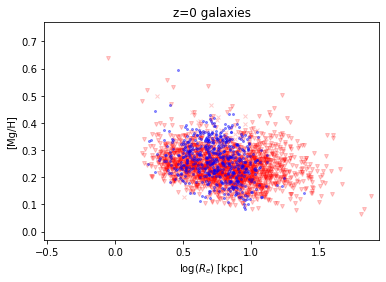

In [25]:
markersize=4

plt.figure()

yy = MgH_Re
xx = np.log10(halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.2, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)

plt.xlim(logRe_lim[0], logRe_lim[1])
plt.ylim(MgHRe_lim[0], MgHRe_lim[1])
plt.xlabel('log($R_e$) [kpc]')
plt.ylabel('[Mg/H]')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=0 galaxies')

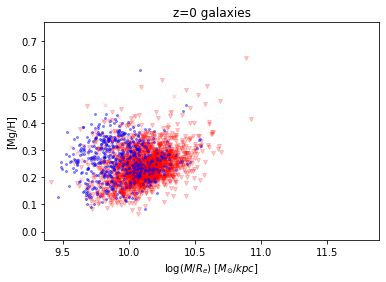

In [26]:
markersize=4

plt.figure()

yy = MgH_Re
xx = np.log10(10**total_mass / halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.2, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)

plt.xlim(MRe_lim[0], MRe_lim[1])
plt.ylim(MgHRe_lim[0], MgHRe_lim[1])
plt.xlabel('log($M/R_e)$ $[M_{\odot}/kpc]$')
plt.ylabel('[Mg/H]')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=0 galaxies')

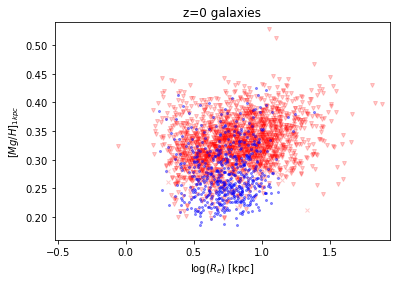

In [27]:
markersize=4

plt.figure()

yy = MgFe_1kpc
xx = np.log10(halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.2, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)

plt.xlim(logRe_lim[0], logRe_lim[1])
plt.ylim(MgH1kpc_lim[0], MgH1kpc_lim[1])
plt.xlabel('log($R_e$) [kpc]')
plt.ylabel('$[Mg/H]_{1 kpc}$')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=0 galaxies')

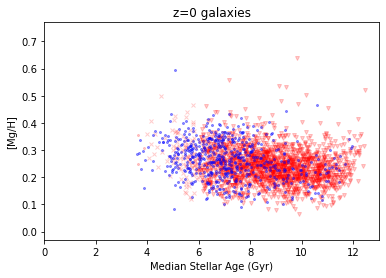

In [7]:
markersize=4

plt.figure()

yy = MgH_Re
xx = median_age

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.2, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)

plt.xlim(bigage_lim[0], bigage_lim[1])
plt.ylim(MgHRe_lim[0], MgHRe_lim[1])
plt.xlabel('Median Stellar Age (Gyr)')
plt.ylabel('[Mg/H]')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')